In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import tensorflow as tf
%matplotlib inline

# LSTM, BI-LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('../data/dataset.csv')
df.head()

,Date,Open,Close,10YR Open Price,ADA Open Price,BNB Open Price,BTC Fear Greed Index,"BTC / Fees, total, USD","BTC / Supply, Miner, held by all mining entities, USD","BTC / Miner revenue, USD",...,DXY Open Price,ETH Open Price,GOLD Open Price,MATIC Open Price,NASDAQ Open Price,NIKKEI225 Open Price,OIL Open Price,S&P500 Open Price,SILVER Open Price,SOL Open Price
0,9/18/2014,456.859985,424.440002,2.625,0.02516,2.05314,30,5494.516757,922278182.1,2127475.011,...,94.879997,308.644989,1216.199951,0.004521,4575.740234,16036.46973,93.970001,2003.069946,18.475000,0.832005
1,9/19/2014,424.102997,394.795990,2.611,0.02516,2.05314,30,5214.342615,863041567.8,1915502.821,...,94.879997,308.644989,1218.300049,0.004521,4606.129883,16177.94043,92.970001,2012.739990,18.295000,0.832005
2,9/20/2014,394.673004,408.903992,2.611,0.02516,2.05314,30,4261.732292,796896261.3,1688158.115,...,94.879997,308.644989,1218.300049,0.004521,4606.129883,16177.94043,92.970001,2012.739990,18.295000,0.832005
3,9/21/2014,408.084991,398.821014,2.611,0.02516,2.05314,30,4235.264753,832455744.7,1812817.173,...,94.879997,308.644989,1218.300049,0.004521,4606.129883,16177.94043,92.970001,2012.739990,18.295000,0.832005
4,9/22/2014,399.100006,402.152008,2.562,0.02516,2.05314,30,3638.427361,811705344.8,1645297.003,...,94.879997,308.644989,1214.900024,0.004521,4568.450195,16281.36035,92.220001,2009.079956,17.700001,0.832005


In [8]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

X = df.drop(['Date', 'Close', 'Google BTC Trend'], axis=1)
y = df['Close']

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

train_size = int(len(df) * 0.7)
validation_size = int((len(df) - train_size) / 2) 

train_X, validation_X = X[0:train_size,:], X[train_size:train_size+validation_size,:]
train_y, validation_y = y[0:train_size,:], y[train_size:train_size+validation_size,:]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
validation_X = validation_X.reshape((validation_X.shape[0], 1, validation_X.shape[1]))

In [10]:
lstm_model = Sequential()
lstm_model.add(LSTM(256, return_sequences=True, activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
lstm_model.add(LSTM(128,  activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', save_best_only=True, monitor='val_loss')

lstm_model.fit(train_X, train_y, epochs=100, batch_size=16,validation_data=(validation_X, validation_y),
          verbose=2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
155/155 - 10s - 65ms/step - loss: 0.0256 - val_loss: 0.0301
Epoch 2/100
155/155 - 3s - 18ms/step - loss: 0.0080 - val_loss: 0.0247
Epoch 3/100
155/155 - 3s - 18ms/step - loss: 0.0063 - val_loss: 0.0278
Epoch 4/100
155/155 - 3s - 18ms/step - loss: 0.0068 - val_loss: 0.0344
Epoch 5/100
155/155 - 2s - 16ms/step - loss: 0.0055 - val_loss: 0.0284
Epoch 6/100
155/155 - 3s - 17ms/step - loss: 0.0055 - val_loss: 0.0167
Epoch 7/100
155/155 - 3s - 17ms/step - loss: 0.0050 - val_loss: 0.0196
Epoch 8/100
155/155 - 3s - 17ms/step - loss: 0.0050 - val_loss: 0.0245
Epoch 9/100
155/155 - 3s - 16ms/step - loss: 0.0046 - val_loss: 0.0154
Epoch 10/100
155/155 - 2s - 16ms/step - loss: 0.0051 - val_loss: 0.0199
Epoch 11/100
155/155 - 3s - 16ms/step - loss: 0.0044 - val_loss: 0.0210
Epoch 12/100
155/155 - 2s - 16ms/step - loss: 0.0049 - val_loss: 0.0188
Epoch 13/100
155/155 - 3s - 16ms/step - loss: 0.0047 - val_loss: 0.0139
Epoch 14/100
155/155 - 2s - 16ms/step - loss: 0.0039 - val_loss: 0.0222


In [11]:
df_test = pd.DataFrame()
df_test['Date'] = pd.to_datetime(df['Date'][train_size+validation_size:len(df)])
df_test

,Date
3004,2022-12-09
3005,2022-12-10
3006,2022-12-11
3007,2022-12-12
3008,2022-12-13
...,...
3530,2024-05-19
3531,2024-05-20
3532,2024-05-21
3533,2024-05-22


In [12]:
# predict using model with df_test_dates
test_X = X[train_size+validation_size:len(df),:]
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
prediction = lstm_model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

inv_test_prediction = np.concatenate((prediction, test_X[:, 1:]), axis=1)
inv_test_prediction = scaler.inverse_transform(inv_test_prediction)
inv_test_prediction = inv_test_prediction[:,0]
df_test['LSTM Predicted Price'] = inv_test_prediction

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


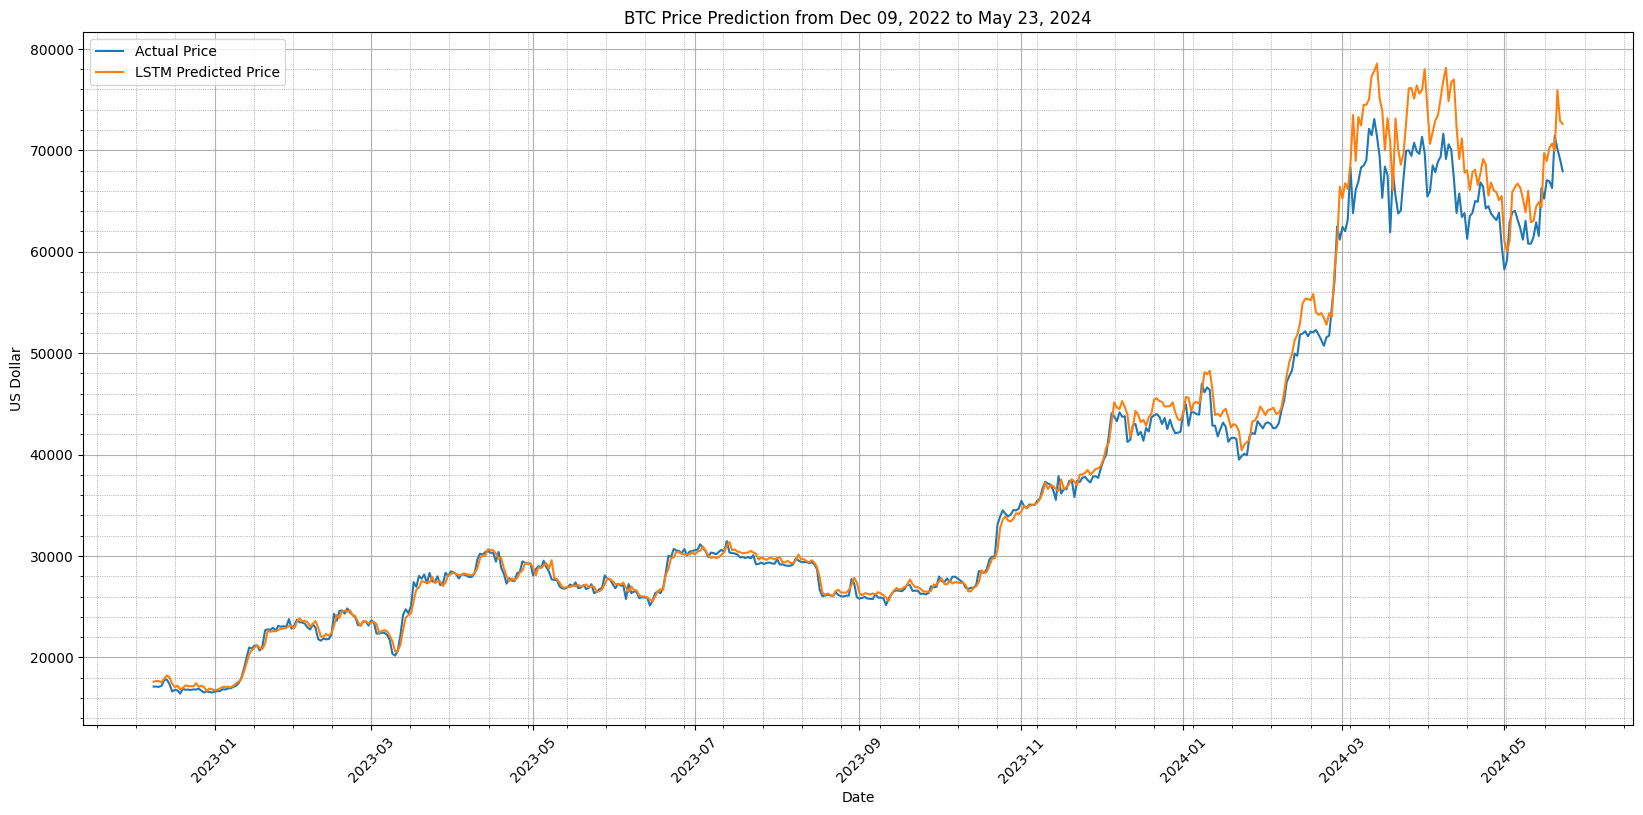

In [13]:
plt.figure(figsize=(20, 9))
plt.plot(df_test['Date'], df['Close'][train_size+validation_size:len(df)], label='Actual Price')
plt.plot(df_test['Date'], df_test['LSTM Predicted Price'], label='LSTM Predicted Price')

plt.title('BTC Price Prediction from Dec 09, 2022 to May 23, 2024')

plt.ylabel('US Dollar')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()

plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.grid(which='major')

plt.show()

In [14]:
# print mae, rmse, r2 score of each model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('\nLSTM') 
print('MAE:', mean_absolute_error(df['Close'][train_size+validation_size:len(df)], df_test['LSTM Predicted Price']))
print('RMSE:', np.sqrt(mean_squared_error(df['Close'][train_size+validation_size:len(df)], df_test['LSTM Predicted Price'])))
print('R2 Score:', r2_score(df['Close'][train_size+validation_size:len(df)], df_test['LSTM Predicted Price']))
print('MAPE:', np.mean(np.abs((df['Close'][train_size+validation_size:len(df)] - df_test['LSTM Predicted Price']) / df['Close'][train_size+validation_size:len(df)])))



LSTM
MAE: 1198.4667560838463
RMSE: 2124.8371405527973
R2 Score: 0.9807457589803087
MAPE: 0.025634066415064438


In [ ]:
import pickle

lstm_model.save('../artifacts/lstm_model.h5')